In [1]:
key = 'e3c39d5f287c7add3f094c057cec257c693905ab'

In [2]:
import pandas_datareader as pdr
import os

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.head()


close   high    low   open    volume  \
symbol date                                                              
AAPL   2016-05-12 00:00:00+00:00  90.34  92.78  89.47  92.72  76314690   
       2016-05-13 00:00:00+00:00  90.52  91.67  90.00  90.00  44392765   
       2016-05-16 00:00:00+00:00  93.88  94.39  91.65  92.39  61259756   
       2016-05-17 00:00:00+00:00  93.49  94.70  93.01  94.55  46916939   
       2016-05-18 00:00:00+00:00  94.56  95.21  93.89  94.16  42062391   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-05-12 00:00:00+00:00  21.095605  21.665378  20.892448  21.651367   
       2016-05-13 00:00:00+00:00  21.137637  21.406178  21.016210  21.016210   
       2016-05-16 00:00:00+00:00  21.922242  22.041334  21.401507  21.574307   
       2016-05-17 00:00:00+00:00  21.831172  22.113724  21.719086  22.078696   
       2016-05-18 00:00:00+00:00  22.081032  22.232815  21.924578  21.987626   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-05-12 00:00:00+00:00  305258760      0.0          1.0  
       2016-05-13 00:00:00+00:00  177571060      0.0          1.0  
       2016-05-16 00:00:00+00:00  245039024      0.0          1.0  
       2016-05-17 00:00:00+00:00  187667756      0.0          1.0  
       2016-05-18 00:00:00+00:00  168249564      0.0          1.0

In [4]:
import pandas as pd

df.to_csv('AAPL.csv')
df1  = pd.read_csv('AAPL.csv')
df2 = df1.reset_index()['close']


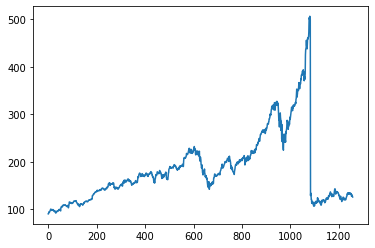

In [5]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [6]:
df2

0        90.34
1        90.52
2        93.88
3        93.49
4        94.56
         ...  
1253    128.10
1254    129.74
1255    130.21
1256    126.85
1257    125.91
Name: close, Length: 1258, dtype: float64

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2    = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [8]:
df2

array([[0.        ],
       [0.00043295],
       [0.00851473],
       ...,
       [0.09589898],
       [0.0878172 ],
       [0.08555622]])

In [9]:
training_size = int(len(df2)*0.70)
test_size  = len(df2)-training_size
train_data,test_data = df2[0:training_size,:],df2[training_size:len(df1),:1]

In [10]:
test_data

array([[0.40841852],
       [0.41337342],
       [0.41279615],
       [0.41883343],
       [0.41443175],
       [0.42193626],
       [0.42515935],
       [0.42321106],
       [0.41575466],
       [0.41291642],
       [0.4123632 ],
       [0.42340349],
       [0.41840048],
       [0.42693927],
       [0.42552014],
       [0.41808779],
       [0.40675887],
       [0.41226699],
       [0.42150331],
       [0.43384245],
       [0.4247264 ],
       [0.42847865],
       [0.43398677],
       [0.43564642],
       [0.44452195],
       [0.45585087],
       [0.45717378],
       [0.45556224],
       [0.45623572],
       [0.45484065],
       [0.46580878],
       [0.46645821],
       [0.48002405],
       [0.47975947],
       [0.48389657],
       [0.48901984],
       [0.5051353 ],
       [0.49811185],
       [0.50381239],
       [0.50042093],
       [0.51196633],
       [0.5274564 ],
       [0.52914011],
       [0.54508719],
       [0.53479254],
       [0.53156945],
       [0.54095009],
       [0.549

In [11]:
train_data.shape

(880, 1)

In [12]:
import numpy 
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
    datax,datay =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] #i=0,1,2,3
        datax.append(a)
        datay.append(dataset[i+time_step, 0])
    return numpy.array(datax), numpy.array(datay) 
    

In [13]:
# reshape into x=t , t+1 , t+2 and ... y= t+n 
time_step =100
x_train, y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data, time_step)

In [14]:
print(x_train)

[[0.         0.00043295 0.00851473 ... 0.05253157 0.05462417 0.05334937]
 [0.00043295 0.00851473 0.00757667 ... 0.05462417 0.05334937 0.05450391]
 [0.00851473 0.00757667 0.01015033 ... 0.05334937 0.05450391 0.05462417]
 ...
 [0.24969333 0.24630186 0.24906795 ... 0.3678172  0.3810463  0.39802766]
 [0.24630186 0.24906795 0.26003608 ... 0.3810463  0.39802766 0.40206855]
 [0.24906795 0.26003608 0.25864101 ... 0.39802766 0.40206855 0.40117859]]


In [15]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [16]:
# create the lstm model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [17]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs =100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 13s 381ms/step - loss: 0.0217 - accuracy: 0.0000e+00 - val_loss: 0.0421 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 2s 162ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0259 - val_accuracy: 0.0036
Epoch 3/100
13/13 [==============================] - 2s 181ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0225 - val_accuracy: 0.0036
Epoch 4/100
13/13 [==============================] - 2s 159ms/step - loss: 6.1043e-04 - accuracy: 0.0000e+00 - val_loss: 0.0233 - val_accuracy: 0.0036
Epoch 5/100
13/13 [==============================] - 2s 186ms/step - loss: 3.6945e-04 - accuracy: 0.0000e+00 - val_loss: 0.0244 - val_accuracy: 0.0036
Epoch 6/100
13/13 [==============================] - 3s 219ms/step - loss: 3.4666e-04 - accuracy: 0.0000e+00 - val_loss: 0.0223 - val_accuracy: 0.0036
Epoch 7/100
13/13 [==============================] - 3s 223ms/step - loss: 3.3720e-04 - accuracy: 0.0

13/13 [==============================] - 2s 186ms/step - loss: 1.5134e-04 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0036
Epoch 56/100
13/13 [==============================] - 2s 178ms/step - loss: 1.5936e-04 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0036
Epoch 57/100
13/13 [==============================] - 2s 189ms/step - loss: 1.6745e-04 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0036
Epoch 58/100
13/13 [==============================] - 2s 170ms/step - loss: 1.4495e-04 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0036
Epoch 59/100
13/13 [==============================] - 2s 169ms/step - loss: 1.4426e-04 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0036
Epoch 60/100
13/13 [==============================] - 2s 151ms/step - loss: 1.4786e-04 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0036
Epoch 61/100
13/13 [==============================] - 2s 151ms/step - loss: 1.4032e-04 - accuracy: 0.

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

test_predict


# import math
# from sklearn.metrics import mean_squared_error
# math.sqrt(mean_squared_error(y_train,train_predict))


# ### Test Data RMSE
# math.sqrt(mean_squared_error(y_test,test_predict))


array([[240.5036  ],
       [234.76118 ],
       [235.33838 ],
       [240.16594 ],
       [247.82782 ],
       [255.87744 ],
       [263.40463 ],
       [272.44675 ],
       [280.20966 ],
       [285.556   ],
       [287.02695 ],
       [284.08197 ],
       [276.95038 ],
       [271.25583 ],
       [268.56027 ],
       [270.73306 ],
       [275.79266 ],
       [279.94876 ],
       [284.48425 ],
       [290.12567 ],
       [293.9484  ],
       [296.3115  ],
       [298.42282 ],
       [300.8189  ],
       [303.62793 ],
       [307.68112 ],
       [312.90125 ],
       [316.43234 ],
       [316.51526 ],
       [314.83353 ],
       [312.36398 ],
       [312.34256 ],
       [313.8197  ],
       [317.44904 ],
       [320.91977 ],
       [323.7092  ],
       [324.7558  ],
       [324.79752 ],
       [324.42154 ],
       [323.89    ],
       [324.5535  ],
       [326.35675 ],
       [328.83307 ],
       [330.1431  ],
       [332.81802 ],
       [336.5544  ],
       [342.95325 ],
       [352.0

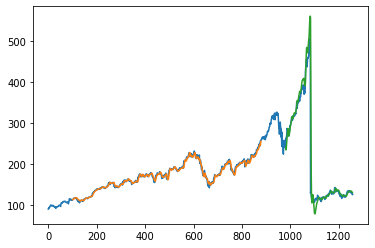

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

378

In [35]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.10010823812387254,
 0.10535177390258565,
 0.10739627179795552,
 0.10487071557426336,
 0.11316897173782314,
 0.11165363800360789,
 0.11201443174984965,
 0.10984966927239925,
 0.10835838845460005,
 0.10773301262778107,
 0.1083102826217679,
 0.10306674684305472,
 0.09741431148526758,
 0.09469633193024657,
 0.09508117859290438,
 0.08577269993986769,
 0.0854359591100

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09433775]
101
1 day input [0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569
 0.07395069 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842
 0.08279014 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743
 0.07276007 0.07425135 0.07468431 0.07110042 0.07651233 0.07855683
 0.08553217 0.08627781 0.09034275 0.09625977 0.10259771 0.09837643
 0.10604931 0.10027661 0.10621768 0.10539988 0.10703548 0.10287432
 0.10381239 0.10006013 0.10578473

8 day output [[0.09928022]]
9 day input [0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727
 0.08543596 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604
 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284
 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575
 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007 0.07425135
 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217 0.08627781
 0.09034275 0.09625977 0.10259771 0.09837643 0.10604931 0.10027661
 0.10621768 0.10539988 0.10703548 0.10287432 0.10381239 0.10006013
 0.10578473 0.10674684 0.1059531  0.10400481 0.10376428 0.09890559
 0.10150331 0.09022249 0

16 day output [[0.10273759]]
17 day input [0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897 0.11165364
 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028 0.10306675
 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596 0.08420926
 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585 0.07165364
 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532 0.0738184
 0.08093806 0.08473842 0.08279014 0.07261575 0.0713169  0.07949489
 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431 0.07110042
 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275 0.09625977
 0.10259771 0.09837643 0.10604931 0.10027661 0.10621768 0.10539988
 0.10703548 0.10287432 0.10381239 0.10006013 0.10578473 0.10674684
 0.1059531  0.10400481 0.10376428 0.09890559 0.10150331 0.09022249
 0.09082381 0.09476849 0.09589898 0.0878172  0.08555622 0.09433775
 0.09372763 0.0939809

25 day output [[0.10703264]]
26 day input [0.1270475  0.12440168 0.11244738 0.10010824 0.10535177 0.10739627
 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839
 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118
 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162 0.09007817
 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069
 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014
 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007
 0.07425135 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217
 0.08627781 0.09034275 0.09625977 0.10259771 0.09837643 0.10604931
 0.10027661 0.10621768 0.10539988 0.10703548 0.10287432 0.10381239
 0.10006013 0.10578473 0.10674684 0.1059531  0.10400481 0.10376428
 0.09890559 0.10150331 0.09022249 0.09082381 0.09476849 0.09589898
 0.0878172  0.08555622 0.09433775 0.09372763 0.09398098 0.09476306
 0.09576295 0.096784   0.09772896 0.09856231 0.09928022 0.09989309
 0.10041736 0.100871

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [40]:

import matplotlib.pyplot as plt

In [41]:
len(df2)


1258

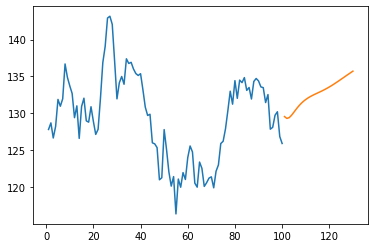

In [42]:
plt.plot(day_new,scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

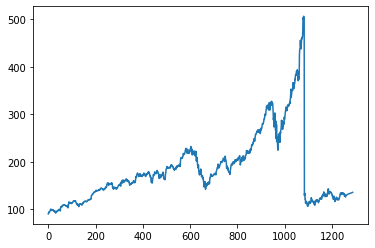

In [46]:
df3=df2.tolist()
df3.extend(lst_output)

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
